<a href="https://colab.research.google.com/github/inbatamilan573/Drowsiness-Detection/blob/main/Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/drive/folders/1GDs1bpa0oJDpuLVTwaIlj5dLU1lwkciz?usp=sharing
#1. Click on the above link
#2. Link will open the dataset in a Google drive
#3. Download the dataset to your local machine, it would be a zipped file
#4. Unzip the downloaded dataset
#5. Upload the dataset to your google drive
#6. You may need to set the correct path of dataset over your drive in the code to run it successfully

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python
!pip install keras
!pip install pickles

In [ ]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
path_O = '/content/drive/MyDrive/Drowsiness_Dataset/Open'
path_C = '/content/drive/MyDrive/Drowsiness_Dataset/Closed'
files =[]
categories =[]
for i in os.listdir(path_O):
    files.append(path_O+'/'+i)
    # 1 for Open
    categories.append(1)
for i in os.listdir(path_C):
    files.append(path_C+'/'+i)
    # 0 for Closed
    categories.append(0)

df = pd.DataFrame({
    'filename': files,
    'category': categories
})

In [ ]:
df

,filename,category
0,/content/drive/MyDrive/Drowsiness_Dataset/Open...,1
1,/content/drive/MyDrive/Drowsiness_Dataset/Open...,1
2,/content/drive/MyDrive/Drowsiness_Dataset/Open...,1
3,/content/drive/MyDrive/Drowsiness_Dataset/Open...,1
4,/content/drive/MyDrive/Drowsiness_Dataset/Open...,1
...,...,...
1443,/content/drive/MyDrive/Drowsiness_Dataset/Clos...,0
1444,/content/drive/MyDrive/Drowsiness_Dataset/Clos...,0
1445,/content/drive/MyDrive/Drowsiness_Dataset/Clos...,0
1446,/content/drive/MyDrive/Drowsiness_Dataset/Clos...,0


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [ ]:
df["category"] = df["category"].replace({0: 'Closed', 1: 'Open'})

train_df, test_df = train_test_split(df, test_size=0.20)


train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
total_train = train_df.shape[0]
total_test = test_df.shape[0]

In [ ]:
batch_size=15

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)




Found 1158 validated image filenames belonging to 2 classes.
Found 290 validated image filenames belonging to 2 classes.


In [ ]:
epochs=10
history = model.fit(
    train_generator,
    epochs=epochs,

)
print(history.history['accuracy'])

Epoch 1/10
78/78 [==============================] - 454s 5s/step - loss: 0.7306 - accuracy: 0.7427
Epoch 2/10
78/78 [==============================] - 11s 139ms/step - loss: 0.4882 - accuracy: 0.8109
Epoch 3/10
78/78 [==============================] - 11s 141ms/step - loss: 0.4738 - accuracy: 0.8169
Epoch 4/10
78/78 [==============================] - 11s 140ms/step - loss: 0.4496 - accuracy: 0.8377
Epoch 5/10
78/78 [==============================] - 11s 143ms/step - loss: 0.4058 - accuracy: 0.8428
Epoch 6/10
78/78 [==============================] - 11s 142ms/step - loss: 0.3232 - accuracy: 0.8791
Epoch 7/10
78/78 [==============================] - 11s 142ms/step - loss: 0.2941 - accuracy: 0.8903
Epoch 8/10
78/78 [==============================] - 11s 142ms/step - loss: 0.2597 - accuracy: 0.9007
Epoch 9/10
78/78 [==============================] - 11s 142ms/step - loss: 0.2547 - accuracy: 0.8860
Epoch 10/10
78/78 [==============================] - 11s 141ms/step - loss: 0.2356 - accuracy

In [ ]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

[0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1
 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0
 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0]


In [ ]:
test_df["category"] = test_df["category"].replace({ 'Closed':0, 'Open':1})
print(confusion_matrix(test_df['category'],predicted_classes))

[[88 62]
 [85 55]]


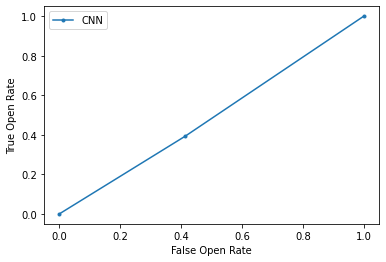

In [ ]:
a,b,_ = roc_curve(test_df['category'], predicted_classes)
plt.plot( a,b, marker='.',label='CNN')
plt.xlabel('False Open Rate')
plt.ylabel('True Open Rate')
plt.legend()
plt.show()

['Closed', 'Open']
[[0.97849566 0.02150429]
 [0.8097429  0.19025709]
 [0.02660821 0.97339183]
 [0.29326424 0.70673573]]
[0 0 1 1]


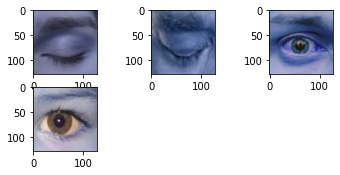

In [ ]:
from matplotlib import pyplot


path = '/content/drive/MyDrive/Drowsiness_Dataset/test'

files =[]
file_path=[]

for i in os.listdir(path):
    files.append(np.array(cv2.resize(cv2.imread(path+'/'+i),IMAGE_SIZE)))
    file_path.append(path+'/'+i)

files = np.array(files)
files = files.astype('float32') / 255

predictions =np.argmax(model.predict(files), axis=-1)
print(['Closed','Open'])
print(model.predict(files))

print (predictions)

#show the images
for i in range(4):
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(np.array(cv2.resize(cv2.imread(file_path[i]),IMAGE_SIZE)))